In [2]:
import json, os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
with open('variable_corona.json', 'r') as f:
    config = json.load(f)

infected_filepath = config['DEFAULT']['file_path_infected']
death_filepath = config['DEFAULT']['file_path_death']
recovered_filepath = config['DEFAULT']['file_path_recovered']

In [4]:
infected_filepath

'/media/atif/BE0E05910E0543BD/University of Bremen MSc/corona_problem/time_series_covid19_confirmed_global.csv'

In [5]:
# reading dataframe
def read_file(filename):
    df = pd.read_csv(filename)
    return df

def rename_country_column(dataframe):
    df = dataframe
    df.rename(columns = {'Country/Region':'Country'}, inplace = True)
    return df
def country_name(df):
    for i in range (df.index[-1]+1):
        if df.iloc[i]["Country"] == "Germany":
            return df.iloc[i]["Country"]
        
def transpose_dataframe(dataframe):
    return dataframe.transpose()

def total_count_column(dataframe, column_name):
    dataframe[column_name] = 0
    m = 0
    for i in range (dataframe.index[-1]+1):
        for j in dataframe.columns[4:-1]:
            m = m+dataframe.iloc[i][j]
        dataframe.loc[i, column_name] = m
        m = 0
    return dataframe
    

In [6]:
df = read_file(infected_filepath)

In [7]:
df = rename_country_column(df)

In [8]:
df.head(4)

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370


In [31]:
print(type(df.iloc[225]['Country']))
print(df.iloc[120][1])
print(type(df.iloc[225][-1]))
print(df.iloc[225][-1])

<class 'str'>
Germany
<class 'numpy.int64'>
161807


In [19]:
c_1 = df.iloc[225][1]
d_1 = df.iloc[225][-1]

[0 1]


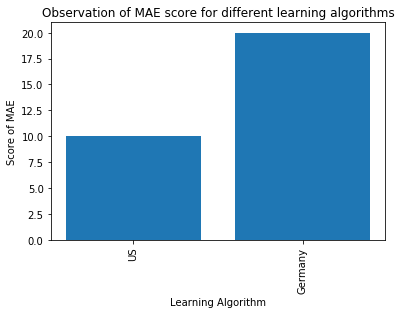

In [32]:
#objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
objects = (df.iloc[225][1], df.iloc[120][1])
y_pos = np.arange(len(objects))
print(y_pos)
#performance = [10,8,6,4,2,1]
performance_MAE = [10,20]

bar_chart = plt.bar(y_pos, performance_MAE, align='center', alpha=1)
# bar_chart[0].set_color('r')
# bar_chart[1].set_color('g')
# bar_chart[2].set_color('b')
# bar_chart[3].set_color('m')
plt.xticks(y_pos, objects,rotation=90)
plt.ylabel('Score of MAE')
plt.xlabel('Learning Algorithm')
plt.title('Observation of MAE score for different learning algorithms')
# plt.savefig('bar_1.png', bbox_inches='tight')
# #plt.legend(objects,loc='best')
plt.show()

In [ ]:
d = country_name(df)

In [ ]:
d

In [ ]:
# cols_list = ["Country/Region"]
# dataframe_sliced = df.iloc[:][cols_list]
# #Bangladesh

In [ ]:
# df.rename(columns = {'Country/Region':'Country'}, inplace = True)

In [ ]:
# sliced_df = df[(df.Country == 'Bangladesh') | (df.Country == 'Germany')]

In [ ]:
# for i in sliced_df.index:
#     print(i)

In [38]:
a = df.loc[df['Country'] == 'US']

In [39]:
for i in a.index:
    print(i)

225


In [ ]:
# df[df.Long == 1.6596]

In [8]:
# target_column = "3/24/20"
# plt.plot(df[target_column], color = 'blue')

In [9]:
df_T = transpose_dataframe(df)

In [10]:
df_T.head()

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,New South Wales,...,NaN,NaN,Northwest Territories,Yukon,NaN,NaN,Anguilla,British Virgin Islands,Turks and Caicos Islands,NaN
Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,Mali,Saint Kitts and Nevis,Canada,Canada,Kosovo,Burma,United Kingdom,United Kingdom,United Kingdom,MS Zaandam
Lat,33,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,-33.8688,...,17.5707,17.3578,64.8255,64.2823,42.6026,21.9162,18.2206,18.4207,21.694,0
Long,65,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.012,151.209,...,-3.99617,-62.783,-124.846,-135,20.903,95.956,-63.0686,-64.64,-71.7979,0
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
plt.subplot(1,2,1)
plt.plot(df_T.iloc[4:][120], color = 'blue') # first is ROW[4:], second is column[120], here column type is integer
plt.xticks(np.arange(0,df_T.shape[0],3),rotation='vertical')
plt.xlim(df_T.index[4], df_T.index[-1])
plt.xlabel('Date') 
plt.ylabel('Infected Patient in '+df.iloc[120]["Country"])
plt.rcParams['figure.figsize'] = (10,5)

plt.subplot(1,2,2)
plt.plot(df_T.iloc[4:][20], color = 'red')
plt.xticks(np.arange(0,df_T.shape[0],3),rotation='vertical')
plt.xlim(df_T.index[4], df_T.index[-1])
plt.xlabel('Date') 
plt.ylabel('Infected Patient in '+df.iloc[20]["Country"])
plt.rcParams['figure.figsize'] = (15,5) # length, height

plt.show()

In [37]:
for i in df["Country"]:
    if i == "US":
        print(i)

US


In [12]:
# df.columns

In [13]:
# df.iloc[120]["Country"]

In [ ]:
# for i in df_T.columns:
#     print(type(i))

In [14]:
# df_T.iloc[4:].plot(y=120)

In [15]:
# df_T.index[-1]

https://stackoverflow.com/questions/46218972/x-axis-label-at-start-end-of-chart-in-matplotlib

In [ ]:
# for i in df_T.index:
#     print(i)

In [ ]:
# df['e_1'] = 0

In [ ]:
# for i in df.columns[4:-1]:
#     print(i)

In [ ]:
# m = 0
# for i in range (df.index[-1]+1):
#     for j in df.columns[4:-1]:
#         m = m+df.iloc[i][j]
#     print("country: ",df.iloc[i]['Country'],"-------- tot val: ",m)
#     m = 0

In [ ]:
# for i in df.iloc[0:]['total_count']:
#     print(type(i))

In [16]:
df = total_count_column(df, 'total_infected_count')

In [45]:
df.head(300)

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,total_infected_count
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,0,1,1,1,2,4,4,4,4,21
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2,2,4,5,5,6,8,10,10,65
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,15,17,17,19,21,25,26,29,31,245
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,1,1,1,1,3,3,3,6,19
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,4,4,4,6,8,9,13,18,19,108
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,3,6
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,0,0,...,6,6,6,7,7,7,7,8,8,104


In [24]:
plt.bar(df.index[120], df.loc[120['total_infected_count']])

TypeError: 'int' object is not subscriptable

In [25]:
df.index[120]

120

In [40]:
print(df.iloc[225]['total_infected_count'])
print(df.iloc[225]['Country'])

11347
US


In [47]:
for i in range (df.index[-1]+1):
#     for j in df.columns[4:-1]:
#         m = m+df.iloc[i][j]
    print("country: ",df.iloc[i]['Country'],"-------- tot val: ",df.iloc[i]['total_infected_count'])

country:  Afghanistan -------- tot val:  21
country:  Albania -------- tot val:  65
country:  Algeria -------- tot val:  245
country:  Andorra -------- tot val:  19
country:  Angola -------- tot val:  2
country:  Antigua and Barbuda -------- tot val:  0
country:  Argentina -------- tot val:  108
country:  Armenia -------- tot val:  6
country:  Australia -------- tot val:  0
country:  Australia -------- tot val:  104
country:  Australia -------- tot val:  0
country:  Australia -------- tot val:  5
country:  Australia -------- tot val:  0
country:  Australia -------- tot val:  0
country:  Australia -------- tot val:  13
country:  Australia -------- tot val:  33
country:  Austria -------- tot val:  390
country:  Azerbaijan -------- tot val:  28
country:  Bahamas -------- tot val:  0
country:  Bahrain -------- tot val:  33
country:  Bangladesh -------- tot val:  39
country:  Barbados -------- tot val:  0
country:  Belarus -------- tot val:  0
country:  Belgium -------- tot val:  1927
count

In [54]:
df.iloc[120][df.columns[60]]

28